# 08 函数の凸性と不等式への応用

黒木玄

2018-06-11

* Copyright 2018 Gen Kuroki
* License: MIT https://opensource.org/licenses/MIT
* Repository: https://github.com/genkuroki/Calculus

このファイルは次の場所できれいに閲覧できる:

* http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/08%20convexity.ipynb

* https://genkuroki.github.io/documents/Calculus/08%20convexity.pdf

このファイルは <a href="https://juliabox.com">Julia Box</a> で利用できる.

自分のパソコンに<a href="https://julialang.org/">Julia言語</a>をインストールしたい場合には

* <a href="http://nbviewer.jupyter.org/gist/genkuroki/81de23edcae631a995e19a2ecf946a4f">WindowsへのJulia言語のインストール</a>

を参照せよ.

論理的に完璧な説明をするつもりはない. 細部のいい加減な部分は自分で訂正・修正せよ.

$
\newcommand\eps{\varepsilon}
\newcommand\ds{\displaystyle}
\newcommand\Z{{\mathbb Z}}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\QED{\text{□}}
\newcommand\root{\sqrt}
\newcommand\bra{\langle}
\newcommand\ket{\rangle}
\newcommand\d{\partial}
$

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#凸函数の定義" data-toc-modified-id="凸函数の定義-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>凸函数の定義</a></span></li><li><span><a href="#2階の導函数の符号と函数の凸性" data-toc-modified-id="2階の導函数の符号と函数の凸性-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2階の導函数の符号と函数の凸性</a></span><ul class="toc-item"><li><span><a href="#2階の導函数の符号と接線の関係" data-toc-modified-id="2階の導函数の符号と接線の関係-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>2階の導函数の符号と接線の関係</a></span></li><li><span><a href="#2階の導函数の符号と函数の凸性の関係" data-toc-modified-id="2階の導函数の符号と函数の凸性の関係-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2階の導函数の符号と函数の凸性の関係</a></span></li><li><span><a href="#指数・対数函数への応用" data-toc-modified-id="指数・対数函数への応用-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>指数・対数函数への応用</a></span></li></ul></li><li><span><a href="#Jensenの不等式" data-toc-modified-id="Jensenの不等式-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Jensenの不等式</a></span><ul class="toc-item"><li><span><a href="#期待値汎函数" data-toc-modified-id="期待値汎函数-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>期待値汎函数</a></span></li><li><span><a href="#Jensenの不等式とその証明" data-toc-modified-id="Jensenの不等式とその証明-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Jensenの不等式とその証明</a></span></li><li><span><a href="#相加相乗平均の不等式" data-toc-modified-id="相加相乗平均の不等式-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>相加相乗平均の不等式</a></span></li><li><span><a href="#Youngの不等式" data-toc-modified-id="Youngの不等式-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Youngの不等式</a></span></li><li><span><a href="#Hölderの不等式" data-toc-modified-id="Hölderの不等式-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Hölderの不等式</a></span><ul class="toc-item"><li><span><a href="#$L^p$-ノルム" data-toc-modified-id="$L^p$-ノルム-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>$L^p$ ノルム</a></span></li><li><span><a href="#一般化されたHölderの不等式" data-toc-modified-id="一般化されたHölderの不等式-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>一般化されたHölderの不等式</a></span></li><li><span><a href="#Cauchy-Schwarzの不等式" data-toc-modified-id="Cauchy-Schwarzの不等式-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Cauchy-Schwarzの不等式</a></span></li><li><span><a href="#分配函数の対数凸性" data-toc-modified-id="分配函数の対数凸性-3.5.4"><span class="toc-item-num">3.5.4&nbsp;&nbsp;</span>分配函数の対数凸性</a></span></li></ul></li><li><span><a href="#Minkowskiの不等式" data-toc-modified-id="Minkowskiの不等式-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Minkowskiの不等式</a></span></li></ul></li></ul></div>

In [1]:
using Plots
gr(); ENV["PLOTS_TEST"] = "true"
#clibrary(:colorcet)
clibrary(:misc)

function pngplot(P...; kwargs...)
    sleep(0.1)
    pngfile = tempname() * ".png"
    savefig(plot(P...; kwargs...), pngfile)
    showimg("image/png", pngfile)
end
pngplot(; kwargs...) = pngplot(plot!(; kwargs...))

showimg(mime, fn) = open(fn) do f
    base64 = base64encode(f)
    display("text/html", """<img src="data:$mime;base64,$base64">""")
end

using SymPy
#sympy[:init_printing](order="lex") # default
#sympy[:init_printing](order="rev-lex")

using SpecialFunctions
using QuadGK

## 凸函数の定義

**定義:** 区間 $I$ 上の実数値函数 $f$ が**下に凸**な函数であるとは, 任意の $a,b\in I$ と実数 $t$ について, 

$$
0\leqq t\leqq 1 \implies f((1-t)a+tb) \leqq (1-t)f(a)+t f(b) 
$$

を満たしていることである. 逆向きの不等式で上に凸な函数を定義する. すなわち, 区間 $I$ 上の実数値函数 $f$ が**上に凸**な函数であるとは, 任意の $a,b\in I$ と実数 $t$ について, 

$$
0\leqq t\leqq 1 \implies f((1-t)a+tb) \geqq (1-t)f(a)+t f(b) 
$$

を満たしていることである. 

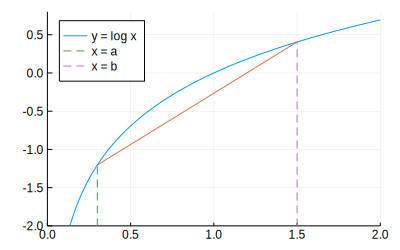

In [2]:
# log x は上に凸な函数

x = 0:0.01:2.0
a, b = 0.3, 1.5
f(x) = log(x)
t = 0:0.01:1.0
g(a,b,t) = (1-t)*f(a) + t*f(b)
X(a,b,t) = (1-t)*a + t*b
plot(size=(400,250), legend=:topleft, xlims=(0,2.0), ylims=(-2.0, 0.8))
plot!(x, f.(x), label="y = log x")
plot!(X.(a,b,t), g.(a,b,t), label="")
plot!([a,a], [-10.0, f(a)], label="x = a", ls=:dash)
plot!([b,b], [-10.0, f(b)], label="x = b", ls=:dash)

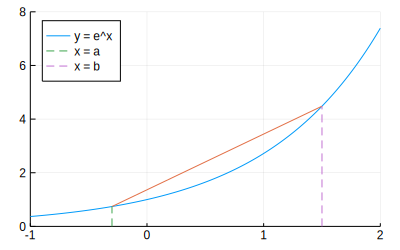

In [3]:
# e^x は下に凸な函数

x = -1:0.01:2
a, b = -0.3, 1.5
f(x) = e^x
t = 0:0.01:1.0
g(a,b,t) = (1-t)*f(a) + t*f(b)
X(a,b,t) = (1-t)*a + t*b
plot(size=(400,250), legend=:topleft, xlims=(-1,2), ylims=(0,8))
plot!(x, f.(x), label="y = e^x")
plot!(X.(a,b,t), g.(a,b,t), label="")
plot!([a,a], [-0.0, f(a)], label="x = a", ls=:dash)
plot!([b,b], [-0.0, f(b)], label="x = b", ls=:dash)

## 2階の導函数の符号と函数の凸性

### 2階の導函数の符号と接線の関係

**定理:** 区間 $I$ 上の実数値函数 $f$ が $C^2$ 級でかつ $I$ 上で $f''\geqq 0$ ならば, $a\in I$ における $y=f(x)$ のグラフは接線 $y=f'(a)(x-a)+f(a)$ の上側にある. 同様に区間 $I$ 上の実数値函数 $f$ が $C^2$ 級でかつ $I$ 上で $f''\leqq 0$ ならば $a\in I$ における $y=f(x)$ のグラフは接線 $y=f'(a)(x-a)+f(a)$ の下側にある.

**証明:** 前半のみを証明する. 区間 $I$ 上の実数値函数 $f$ が $C^2$ 級でかつ $I$ 上で $f''\geqq 0$ であると仮定し, $a\in I$ とする. $f$ は $C^2$ 級なのでTaylorの公式より, $x\in I$ について,

$$
f(x) = f(a) + f'(a)(x-a) + R, \qquad
R = f''(\xi)\frac{(x-a)^2}{2}.
$$

ここで $\xi$ は $a$ と $x$ のあいだのある実数である. $f''\geqq 0$ より, $R\geqq 0$ となる. ゆえに, $f(x)\geqq f(a) + f'(a)(x-a)$ となる.  これで, $y=f(x)$ のグラフは接線 $y=f'(a)(x-a)+f(a)$ の上側にあることがわかった. $\QED$

**注意:** 上の定理の $C^2$ 級の仮定は2回微分可能性の仮定に弱めることができる. $\QED$

**注意:** 上の定理の証明中の剰余項は

$$
R = \int_a^x dx_1\int_a^{x_1}\,dx_2\;f''(x_2)
$$

とも書ける. $f''\geqq 0$ のとき, $x>a$ ならば $x_1,x_2$ は $a<x_1<x_2<x$ の範囲を動くので積分の結果は $0$ 以上になり, $x<a$ ならば $x_1,x_2$ は $x<x_1<x_2<a$ の範囲を動き, $x_2$ のみに関する積分の結果は $0$ 以下になり, さらに $x_1$ についても積分すると $0$ 以上になる. $\ds\int_b^a f(x)\,dx = -\int_a^b f(x)\,dx$ であることに注意せよ. $\QED$

### 2階の導函数の符号と函数の凸性の関係

**定理:** 区間 $I$ 上の実数値函数 $f$ が $C^2$ 級でかつ $I$ 上で $f''\geqq 0$ ならば $f$ は下に凸である. 同様に区間 $I$ 上の実数値函数 $f$ が $C^2$ 級でかつ $I$ 上で $f''\leqq 0$ ならば $f$ は上に凸である.

**証明:** 前半のみを証明する. 区間 $I$ 上の実数値函数 $f$ が $C^2$ 級でかつ $I$ 上で $f''\geqq 0$ であると仮定する. $a,b\in I$ と仮定し, $c=(1-t)a+tb$ とおく. $0\leqq t\leqq 1$ であると仮定する. $(1-t)f(a)+tf(b)\geqq f(c)$ を示せばよい. $f$ は $C^2$ 級なので Taylor の公式より,

$$
\begin{aligned}
&
f(a) = f(c) + f'(c)(a-c) + R(a),
\\ &
f(b) = f(c) + f'(c)(b-c) + R(b),
\\ &
R(x) = f''(\xi_x)\frac{(x-c)^2}{2}.
\end{aligned}
$$

ここで, $\xi_x$ は $c$ と $x$ のあいだのある実数である. $f''\geqq 0$ という仮定より, $R(x)\geqq 0$ となることがわかる. ゆえに

$$
\begin{aligned}
&
f(a) \geqq f(c) + f'(c)(a-c), 
\\ &
f(b) \geqq f(c) + f'(c)(b-c).
\end{aligned}
$$

1つ目の不等式の両辺に $(1-t)$ をかけ, 2つめの不等式の両辺に $t$ をかけると

$$
\begin{aligned}
(1-t)f(a) &\geqq (1-t)f(c) + f'(c)((1-t)a-(1-t)c),
\\ 
t\;f(b)   &\geqq tf(c) + f'(c)(tb-tc).
\end{aligned}
$$

これらをたすと, $c = (1-t)a+tb$ とおいたことより, 

$$
\begin{aligned}
(1-t)f(a)+tf(b) &\geqq f(c) + f'(c)((1-t)a+tb-c) = f(c).
\end{aligned}
$$

これで $f$ が下に凸であることが示された. $\QED$

**注意:** 上の証明の本質はTaylorの公式の剰余項が0以上になることである. $f$ が $C^2$ 級であるという仮定を2回微分可能性の仮定に弱めても, $c$ と $x$ のあいだのある実数 $\xi_x$ が存在して, 

$$
f(x) = f(c) + f'(c)(x-c) + R, \quad R = \frac{1}{2}f''(\xi_x)(x-c)
$$

となるという形でTaylorの定理が成立している. このことを使えば上の定理における $C^2$ 級の仮定を2回微分可能性の仮定に弱めることができる. $\QED$

**問題:** 上と同様にして $f''\leqq 0$ ならば $f$ が上に凸であることの証明を書き下せ. $\QED$

**例:** $f(x)=e^{ax}$ とおくと $f'(x)=ae^{ax}$, $f''(x)=a^2 e^{ax}\geqq 0$ を満たしているので, $f$ は下に凸な函数である. $\QED$

**例:** $x>0$ に対して $f(x)=\log x$ とおくと $f'(x)=1/x$, $f''(x)=-1/x^2<0$ なので, $f$ は上に凸な函数である. $\QED$

**例題:** $a$ は実数であるとし, $x>0$ に対して $f(x)=x^a$ とおく. $f(x)$ は凸性について調べよ.

**解答例:** $x>0$ であるとする. $f'(x)=ax^{a-1}$, $f''(x)=a(a-1)x^{a-2}$ であり, $x^{a-2}>0$ である. ゆえに, $a(a-1)\geqq 0$ のとき, すなわち $a\leqq 0$ または $1\leqq a$ のとき, $f$ は下に凸になり, $a(a-1)\leqq 0$ のとき, すなわち $0\leqq a\leqq 1$ のとき, $f$ は上に凸になる. $\QED$

### 指数・対数函数への応用

**問題:** すべての $x\in\R$ について $1+x\leqq e^x$ となることを示せ. 

**解答例:** $y=e^x$ の $x=0$ での接線は $y=1+x$ であり, $f''(x)=e^x\geqq 0$ であるから, 上の定理より, $1+x\leqq ex$. $\QED$

**注意:** この問題の結果より, $1-x \leqq e^{-x}$ なので, $x<1$ のとき $e^x\leqq (1-x)^{-1}$ となる. これで 

$$
1+x\leqq e^x\leqq (1-x)^{-1} \qquad (x<1)
$$

となることがわかった. $a>0$, $-a\leqq t<a$ のとき, この不等式の $x=\ds\frac{t}{a}$ を代入して全体を $a$ 乗すると次が得られる:

$$
\left(1+\frac{t}{a}\right)^a \leqq e^t \leqq \left(1-\frac{t}{a}\right)^{-a}
\qquad (-a\leqq t< a).
\qquad \QED
$$

**注意:** 上の問題の結果より, $x>-1$ のとき, $\log(1+x)\leqq x$ となることもわかる. $\QED$

**問題:** $x>-1$ のとき $\ds\frac{x}{1+x}\leqq \log(1+x)$ となることを示せ.

**解答例:** $\ds f(x) = \log(1+x) - \frac{x}{1+x}$ とおく. $f(0)=0$ である. $\ds\frac{x}{1+x}=1-\frac{1}{1+x}$ と使って, $f$ を微分すると,

$$
f'(x) = \frac{1}{1+x} - \frac{1}{(1+x)^2} = \frac{x}{(1+x)^2}
$$

なので, $x<0$ において $f'<0$ で $f$ は単調減少し, $x>0$ において $f'>0$ で $f$ は単調増加する. さらに $f(0)=0$ なので, $f(x)\geqq 0$ すなわち, $\ds \frac{x}{1+x}\leqq \log(1+x)$ である. $\QED$

**注意:** $\ds f''(x)=\frac{1-x}{(x+1)^3}$ なので, $-1<x\leqq 1$ で $f''(x)\geqq 0$ となるが, $x>1$ で $f''(x)<0$ となってしまうので, 上の問題と同様にこの問題を解くことはできない. $\QED$

**以上のまとめ:** $x>-1$ のとき

$$
\frac{x}{1+x}\leqq \log(1+x)\leqq x.
\qquad\QED
$$

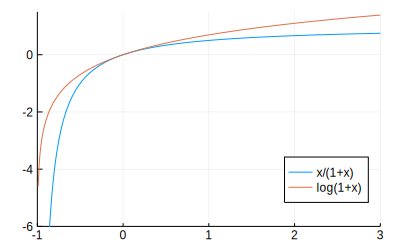

In [4]:
f(x) = x/(1+x)
g(x) = log(1+x)
x = -0.99:0.01:3
plot(size=(400, 250), legend=:bottomright, xlim=(-1,3), ylims=(-6,1.5))
plot!(x, f.(x), label="x/(1+x)")
plot!(x, g.(x), label="log(1+x)")

**問題:** $\ds -\frac{1}{2}\leqq x\leqq 0$ ならば $\log(1+x)\geqq 2x$ となることを示せ.

**解答例:** $f(x)=\log(1+x)-2x$ とおく. $f(0)=0$ である. ゆえに $\ds -\frac{1}{2}\leqq x\leqq 0$ で単調減少するならば, $\ds -\frac{1}{2}\leqq x\leqq 0$ で $f(x)\leqq 0$ となり, 示したいことが示される. そのことを確認するために $f(x)$ を微分すると,

$$
f'(x) = \frac{1}{1+x}-2 = \frac{-(2x+1)}{1+x}
$$

なので $\ds x\geqq-\frac{1}{2}$ ならば $f'(x)\leqq 0$ となるので, そこで $f(x)$ は単調減少する. $\QED$

**注意:** $f(x)=\log(1+x)-2x$ は上に凸な函数なので, $f(a)=0$ となる $a<0$ を取れば $f(x)\geqq 0$ と $a\leqq x\leqq 0$ は同値になる. 実際に $a$ を計算すると $a=-0.79681213\cdots$ となる. $\QED$

f(-0.79681213) = 5.84896575617222e-11
f(-0.79681214) = -2.9157047887196086e-8


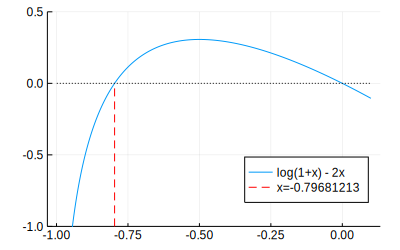

In [5]:
f(x) = log(1+x) - 2x
@show f(-0.79681213)
@show f(-0.79681214)

a = -0.79681213
x = -0.999:0.001:0.1
plot(size=(400,250), legend=:bottomright, ylims=(-1,0.5))
plot!(x, f.(x), label="log(1+x) - 2x")
plot!(x, zeros(x), label="", color="black", ls=:dot)
plot!([a,a], [-1,0], label="x=$a", color=:red, ls=:dash)

**問題:** $a>0$ であるとし, $-a<t<a$ であるとする. $\ds\left(1+\frac{t}{a}\right)^a$ は $a$ について単調増加し, $\ds\left(1-\frac{t}{a}\right)^{-a}$ は $a$ について単調減少することを示せ.

**解答例:** それぞれの対数を取ってから $a$ で微分する, 上の方の問題で示した $\log(1+x)$ に関する不等式

$$
\frac{x}{1+x} \leqq \log(1+x)\qquad (x>-1)
$$

より, 

$$
\begin{aligned}
&
\frac{\d}{\d a}\log\left(1+\frac{t}{a}\right)^a =
\log\left(1+\frac{t}{a}\right) - \frac{t/a}{1+t/a} \geqq 0,
\\ &
\frac{\d}{\d a}\log\left(1-\frac{t}{a}\right)^{-a} =
-\log\left(1-\frac{t}{a}\right) + \frac{-t/a}{1-t/a} \leqq 0.
\end{aligned}
$$

ゆえに, $\ds\left(1+\frac{t}{a}\right)^a$ は $a$ について単調増加し, $\ds\left(1-\frac{t}{a}\right)^{-a}$ は $a$ について単調減少する. $\QED$

**問題:** 以上の結果をまとめて用いて, 

$$
\lim_{a\to\infty}\left(1+\frac{t}{a}\right)^a =
\lim_{a\to\infty}\left(1-\frac{t}{a}\right)^{-a} =
e^t
$$

を証明せよ. 

**解答例:** 上の方の注意では

$$
\left(1+\frac{t}{a}\right)^a \leqq e^t \leqq \left(1-\frac{t}{a}\right)^{-a}
\tag{$*$}
\qquad (-a<t<a)
$$

という不等式が成立していることを指摘している. さらにすぐ上の問題によって, $\ds\left(1+\frac{t}{a}\right)^a$, $\ds\left(1-\frac{t}{a}\right)^{-a}$ はそれぞれ $a$ について単調増加, 単調減少するので, どちらも $a\to\infty$ で収束する.  $a$ を十分に大きくして $\ds\frac{t^2}{a^2}\leqq\frac{1}{2}$ となるようにすると, 上の方の問題で示した不等式

$$
\log(1+x) \geqq 2x \qquad \left(-\frac{1}{2}\leqq x\leqq 0\right)
$$

を使うことができて,

$$
0\geqq 
\log\frac{(1+t/a)^a}{(1-t/a)^{-a}} =
a\log\left(1-\frac{t^2}{a^2}\right) \geqq 
a\cdot 2\left(-\frac{t^2}{a^2}\right) = 
-\frac{2t^2}{a} \to 0 \quad (q\to\infty).
$$

となるので, $a\to\infty$ のとき $\ds \log\frac{(1+t/a)^a}{(1-t/a)^{-a}}\to 0$ すなわち $\ds \frac{(1+t/a)^a}{(1-t/a)^{-a}}\to 1$ となる. これで $\ds\left(1+\frac{t}{a}\right)^a$, $\ds\left(1-\frac{t}{a}\right)^{-a}$ が同じ値に収束することがわかった.  したがって不等式($*$)より, 欲しい結果が得られる. $\QED$

**注意:** 不等式($*$)は極限で指数函数が現われる結果の極限操作を初等的に実行したいときに便利な不等式である. $\QED$

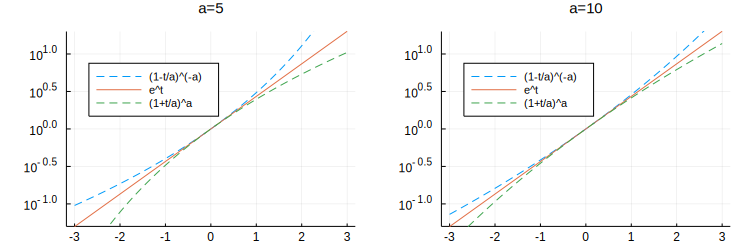

In [6]:
f(t) = e^t
g(a,t) = (1+t/a)^a
h(a,t) = (1-t/a)^(-a)
t = -3:0.01:3

PP = []
for a in [5, 10, 20, 40]
    P = plot(title="a=$a", titlefontsize=10, legendfontsize=7)
    plot!(legend=:topleft, yscale=:log, ylims=(10^(-1.3), 10^1.3))
    plot!(t, h.(a,t), label="(1-t/a)^(-a)", ls=:dash)
    plot!(t, f.(t), label="e^t")
    plot!(t, g.(a,t), label="(1+t/a)^a", ls=:dash)
    push!(PP, P)
end
plot(PP[1:2]..., size=(750,250), layout=@layout([a b]))

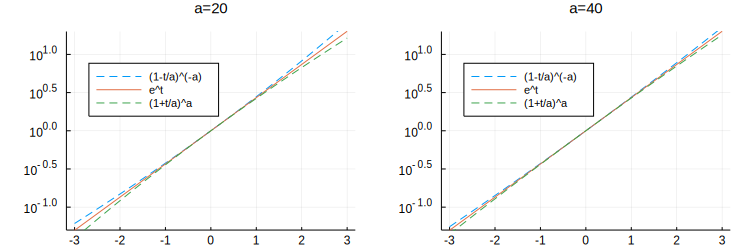

In [7]:
plot(PP[3:4]..., size=(750,250), layout=@layout([a b]))

## Jensenの不等式

### 期待値汎函数

函数を数に対応させる函数を**汎函数** (functional)と呼ぶことがある.

**函数の例:** $x$ を $x$ に対応させる函数を $x$ と書く.

すべての $x$ を一定の値 $\alpha$ に対応させる函数も同じ記号の $\alpha$ で書き, 定数函数と呼ぶ. $f(x)=\alpha$ とおいて記号 $f$ を利用すると煩雑になるので, 単に $\alpha$ と書いて代用するということである. 数としての $\alpha$ と定数函数としての $\alpha$ を同じ記号で書くので混乱しないように注意して欲しい. 

例えば, すべての $x$ を $1$ に対応させる函数も単に $1$ と書く. 
$\QED$

**定義:** 函数 $f$ を数 $E[f]$ に対応させる函数 $E[\ ]$ (汎函数)が以下の条件を満たしているとき, $E[\ ]$ は**期待値汎函数** (expextation functional)であると言うことにする:

**(1) 線形性:** 函数 $f,g$ と数 $\alpha,\beta$ に対して, $E[\alpha f+\beta g]=\alpha E[f]+\beta E[g]$.

**(2) 単調性:** 函数 $f, g$ のあいだで常に $f\leqq g$ が成立しているならば $E[f]\leqq E[g]$.

**(3) 規格化条件:** 定数函数 $\alpha$ について,  $E[\alpha]=\alpha$. $\QED$

**例:** 区間 $I$ 上の函数を数 $E[f]$ に対応させる函数 $E[\ ]$ を以下のように定めると, $E[\ ]$ は期待値汎函数になる. まず $a_1,\ldots,a_n\in I$ を任意に取る. $w_1,\ldots,w_n$ は0以上の実数でかつ $w_1+\cdots+w_n=1$ を満たしていると仮定する. そして区間 $I$ 上の函数 $f$ に対して

$$
E[f] = \sum_{i=1}^n w_i f(a_i) = w_1 f(a_1)+\cdots+w_n f(a_n)
$$

と定める. このようにして定められた $E[\ ]$ が実際に期待値汎函数の性質を満たしていることは以下のようにして確認できる.

(1) 区間 $I$ 上の函数 $f,g$ と数 $\alpha,\beta$ について

$$
\begin{aligned}
E[\alpha f+\beta g] &= \sum_{i=1}^n w_i(\alpha f(a_i)+\beta g(a_i)) =
\sum_{i=1}^n (\alpha w_i f(a_i)+\beta w_i g(a_i))
\\ &=
\alpha\sum_{i=1}^n w_i f(a_i) + \beta\sum_{i=1}^n w_i g(a_i) = \alpha E[f]+\beta E[g].
\end{aligned}
$$

(2) 区間 $I$ 上で $f\leqq g$ が成立していると仮定すると, $w_i\geqq 0$ より $w_i f(a_i)\leqq w_i g(a_i)$ も成立するので

$$
E[f] = \sum_{i=1}^n w_i f(a_i) \leqq \sum_{i=1}^n w_i g(a_i) = E[g].
$$

(3) 定数函数 $f(x)=\alpha$ について $f(a_i)=\alpha$ が成立しているので, $w_1+\cdots+w_n=1$ という仮定より, 

$$
E[\alpha] = E[f] = \sum_{i=1}^n w_i f(a_i) = \sum_{i=1}^n w_i \alpha = \alpha.
$$

これで示すべきことがすべて示された. 

特に $w_i=1/n$ であるとき, $E[f]$ は

$$
E[f] = \frac{f(a_1)+\cdots+f(a_n)}{n}
$$

と $f(a_i)$ たちの加法平均になる. $\QED$

抽象的な期待値汎函数の概念が難しいと感じる人は, 一般的な期待値汎函数の定義を忘れてこの例の $E[f]$ またはさらにその特別な場合である加法平均の場合のみを考えれば十分である. 

**問題:** $a<b$ であるとする. 閉区間 $I=[a,b]$ 上の連続函数 $f$ を

$$
E[f] = \frac{1}{b-a}\int_a^b f(x)\,dx
$$

に対応させる函数 $E[\ ]$ は期待値汎函数であることを示せ. $\QED$

**問題:** $\R$ 上の函数 $p(x)$ は $p(x)\geqq 0$ ($x\in\R$) と $\int_{-\infty}^\infty p(x)\,dx = 1$ を満たしていると仮定する. (このような $p(x)$ は**確率密度函数**と呼ばれる.) このとき, $\R$ 上の(適当によい条件を仮定した)函数 $f$ を

$$
E[f] = \int_{-\infty}^\infty f(x)p(x)\,dx
$$

に対応させる函数 $E[\ ]$ が期待値汎函数であることを示せ. ($E[f]$ は確率密度函数 $p(x)$ が定める確率分布に関する**確率変数** $f$ の期待値と呼ばれる.)

**注意:** 上の問題はこの問題で

$$
p(x) = \begin{cases}
\dfrac{1}{b-a} & (a\leqq x\leqq b) \\
0 & (\text{それ以外}) \\
\end{cases}
$$

とした場合になっている. $\QED$

**解答例:** 以下では $\int_{-\infty}^\infty$ を $\int$ と略記する.

(1) 数 $\alpha$, $\beta$ と函数 $f$, $g$ について

$$
E[\alpha f+\beta g] = \int(\alpha f(x)+\beta g(x))p(x)\,dx =
\alpha\int f(x)p(x)\,dx + \beta\int g(x)p(x)\,dx = 
\alpha E[f]+\beta E[g].
$$

(2) $\R$ 上で $f\leqq g$ が成立していると仮定すると, $p(x)\geqq 0$ より $f(x)p(x)\leqq g(x)p(x)$ も成立するので

$$
E[f] = \int f(x)p(x)\,dx \leqq \int g(x)p(x)\,dx = E[g].
$$

(3) 定数函数 $f(x)=\alpha$ について, $\int p(x)\,dx=1$ という仮定より, 

$$
E[\alpha] = \int \alpha p(x)\,dx = \alpha.
$$

これで示すべきことがすべて示された. $\QED$

### Jensenの不等式とその証明

**Jensenの不等式:** $E[\ ]$ は区間 $I$ 上の函数の期待値汎函数であるとし, $f$ は区間 $I$ 上の上に凸(もしくは下に凸)な函数であるとする. このとき

$$
E[f(x)] \leqq f(E[x]) \qquad (\text{もしくは}\ E[f(x)]\geqq f(E[x])).
$$

例えば

$$
E[f(x)] = \sum_{i=1}^n w_i f(a_i), \quad w_i\geqq 0, \quad \sum_{i=1}^n w_i = 1
$$

のとき, 

$$
\begin{aligned}
&
w_1 f(a_1) + \cdots + w_n f(a_n) \leqq f(w_1 a_1 + \cdots + w_n a_n)
\\ &
(\text{もしくは}\ w_1 f(a_1) + \cdots + w_n f(a_n) \geqq f(w_1 a_1 + \cdots + w_n a_n)).
\end{aligned}
$$

特にこれの $n=2$ の場合には $f$ が上に凸(もしくは下に凸)であることの定義とこれらは同値であることに注意せよ. すなわち, 函数 $f$ がJensenの不等式を満たすことと上(もしくは下)に凸なことは同値になる. この意味でJensenの不等式は函数の凸性を言い換えた結果になっている.

**証明:** 簡単のため $f$ は $C^1$ 級であると仮定する. ($C^1$ 級でない場合にも同様の方法で証明できるが, 「接線」の存在を別に証明する必要が生じる.)

$f$ は上に凸であると仮定する. 

$\mu = E[x]$ とおく. $E[f(x)]\leqq f(\mu)$ を示せばよい. $x=\mu$ における $y=f(x)$ の接線を $y=\alpha(x-\mu)+f(\mu)$ と書く. $f$ は上に凸であると仮定したので

$$
f(x)\leqq \alpha(x-\mu)+f(\mu)
$$

が成立している(図を描いてみよ). ゆえに $E[\ ]$ の性質より

$$
E[f(x)]\leqq E[\alpha(x-\mu)+f(\mu)] = \alpha(E[x]-E[\mu]) + E[f(\mu)] = f(\mu).
$$

最初の不等号は期待値汎函数の単調性より, 1つ目の等号は線形性より, 2つ目の等号は規格化条件より. これで示すべきことがすべて示された. $\QED$

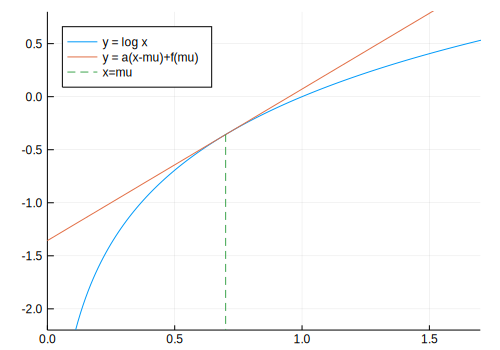

In [8]:
x = 0:0.01:2.0
μ = 0.7
f(x) = log(x)
g(μ,x) = (1/μ)*(x-μ) + f(μ)
plot(size=(500,350), legend=:topleft, xlims=(0,1.7), ylims=(-2.2, 0.8))
plot!(x, f.(x), label="y = log x")
plot!(x, g.(μ,x), label="y = a(x-mu)+f(mu)")
plot!([μ, μ], [-3.0, f(μ)], label="x=mu", ls=:dash)

**問題:** 上に凸な函数 $f(x)$ と

$$
E[g(x)] = w_1 g(a_1)+\cdots+w_n g(a_n), \quad
w_i\geqq 0, \quad w_1+\cdots+w_n=1
$$

に関するJensenの不等式

$$
w_1 f(a_1)+\cdots + w_n f(a_n) \leqq f(w_1 a_1 +\cdots+ w_n a_n)
\tag{$*$}
$$

を $n$ に関する数学的帰納法を用いて直接証明せよ.

**解答例:** $n=1$ のとき, ($*$) は $f(a_1)\leqq f(a_1)$ を意味するので, 自明に正しい.

$n=N\geqq 1$ に関する ($*$) が常に成立していると仮定し(帰納法の仮定),

$$
w_i \geqq 0, \quad w_1+\cdots+w_N+w_{N+1} = 1
$$

と仮定する. もしも $w_{N+1}=1$ ならば $n=N+1$ の場合の ($*$) は自明に成立している. 以下では $w_{N+1}<1$ と仮定し, 

$$
t_i = \frac{w_i}{1-w_{N+1}}
$$

とおく. このとき, $w_i\geqq 0$, $w_1+\cdots+w_N=1-w_{N+1}$ より, 

$$
t_i \geqq 0, \quad
t_1+\cdots+t_N = \frac{w_1+\cdots+w_N}{1-w_{N+1}} = 1.
$$

したがって, $n=N$ の場合の($*$)より, 

$$
t_1 f(a_1)+\cdots+t_N f(a_N) \leqq f(t_1 a_1+\cdots+t_N a_N).
$$

$f$ は上に凸と仮定してあったので, $w_i=(1-w_{N+1})t_i$ を使うと,

$$
\begin{aligned}
w_1 f(a_1)+\cdots+w_N f(a_N)+w_{N+1}f(a_{N+1}) &=
(1-w_{N+1})(t_1 f(a_1)+\cdots+t_N f(a_N))+w_{N+1}f(a_{N+1})
\\ &\leqq
(1-w_{N+1})f(t_1 a_1+\cdots+t_N a_N) + w_{N+1} f(a_{N+1})
\\ &\leqq
f((1-w_{N+1})(t_1 a_1+\cdots+t_N a_N)+w_{N+1} a_{N+1})
\\ &=
f(w_1 a_1+\cdots+w_N a_N+w_{N+1} a_{N+1}) .
\end{aligned}
$$

ここで, 2行目で $n=N$ の場合の($*$)を使い, 3行目で $f$ が上に凸であることを使った.

ゆえに数学的帰納法によってすべての $n$ について ($*$) が成立する. $\QED$

### 相加相乗平均の不等式

**例:** $a_i>0$ であるとし, 

$$
E[f(x)] = \frac{f(a_1)+\cdots+f(a_n)}{n}
$$

とおく. $x>0$ に対して $f(x)=\log x$ とおく. このとき, $f(x)=\log x$ は下に凸なので, Jensenの不等式より $E[f(x)] \leqq f(E[x])$. そして, 

$$
E[f(x)] = \frac{\log a_1+\cdots+\log a_n}{n} = \log(a_1\cdots a_n)^{1/n}, \quad
f(E[x]) = \log\frac{a_1+\cdots+a_n}{n}
$$

なので, $\log$ の単調増加性より, 

$$
(a_1\cdots a_n)^{1/n} \leqq \frac{a_1+\cdots+a_n}{n}.
$$

これでJensenの不等式が相加相乗平均の不等式を含んでいることがわかった. $\QED$

**例題:** 下に凸な函数 $f(x)=e^x$ に関するJensenの不等式を用いて相加相乗平均の不等式を証明し直せ.

**解答例:** $a_i>0$ であるとし, $A_i=\log a_i$, $\ds E[f(x)] = \frac{f(A_1)+\cdots+f(A_n)}{n}$ とおくと, $f(x)=e^x$ のとき

$$
\begin{aligned}
&
E[f(x)] = E[e^x] = \frac{e^{A_1}+\cdots+e^{A_n}}{n} = \frac{a_1+\cdots+a_n}{n}, 
\\ &
f(E[x]) = e^{(A_1+\cdots+A_n)/n} = \left(e^{A_1}\cdots e^{A_n}\right)^{1/n} = (a_1\cdots a_n)^{1/n}.
\end{aligned}
$$

下に凸な函数 $f(x)=e^x$ に関するJensenの不等式 $E[f(x)] \geqq f(E[x])$ より,

$$
\frac{a_1+\cdots+a_n}{n} \geqq (a_1\cdots a_n)^{1/n}.
$$

これで示すべきことが示された. $\QED$

### Youngの不等式

**Youngの不等式の一般化:** $p_i>0$, $\ds\frac{1}{p_1}+\cdots+\frac{1}{p_n}=1$, $a_i>0$ のとき

$$
a_1\cdots a_n \leqq \frac{a_1^{p_1}}{p_1}+\cdots+\frac{a_n^{p_n}}{p_n}
$$

$n=2$ の場合をYoungの不等式と呼ぶ. すなわち $p>0$, $q>0$, $\ds\frac{1}{p}+\frac{1}{q}=1$, $a>0$, $b>0$ のときの

$$
ab \leqq \frac{a^p}{p} + \frac{b^q}{q}
$$

という不等式を**Youngの不等式**と呼ぶ.

**証明:** 上に凸な函数 $f(x)=\log x$ に関するJensenの不等式より

$$
\log(a_1\cdots a_n)
= \frac{\log a_1^{p_1}}{p_1} + \cdots + \frac{\log a_n^{p_n}}{p_n}
\leqq \log\left(\frac{a_1^{p_1}}{p_1}+\cdots+\frac{a_n^{p_n}}{p_n}\right)
$$

ゆえに

$$
a_1\cdots a_n \leqq \frac{a_1^{p_1}}{p_1}+\cdots+\frac{a_n^{p_n}}{p_n}
\qquad \QED
$$

**問題:** $a,b>0$, $p,q>0$, $\ds\frac{1}{p}+\frac{1}{q}=1$ のとき

$$
ab \leqq \frac{a^p}{p} + \frac{b^p}{q}
$$

となること(つまりYoungの不等式)を直接的に証明してみよ.

**解答例1:** $f(x)=\log x$ が上に凸であることより, $A,B>0$ について

$$
\frac{1}{p}\log A + \frac{1}{q}\log B\leqq \log\left(\frac{A}{p}+\frac{B}{q}\right).
$$

ゆえに $A=a^p$, $B=b^q$ とおくと, 

$$
\log(ab) = \frac{1}{p}\log a^p + \frac{1}{q}\log b^q\leqq \log\left(\frac{a^p}{p}+\frac{b^q}{q}\right).
$$

したがって,

$$
ab \leqq \frac{a^p}{p} + \frac{b^p}{q}. \qquad \QED
$$

**解答例2:** $f(x)=e^x$ が下に凸であることより, 実数 $A,B$ について

$$
\frac{1}{p}e^A + \frac{1}{q}e^B \geqq e^{A/p+B/q} = e^{A/p} e^{B/q}.
$$

ゆえに $A=\log a^p$, $B=\log b^q$ とおくと, 

$$
\frac{a^p}{p}+\frac{b^q}{q} \geqq ab. \qquad \QED
$$

**解答例3:** $f(x)$ は $x\geqq 0$ の狭義単調増加連続函数で $f(0)=0$ を満たすものであるとし, 

$$
X = \{\,(x,y)\mid 0\leqq x\leqq a,\ 0\leqq y\leqq f(x)\,\}, \quad
Y = \{\,(x,y)\mid 0\leqq x\leqq f^{-1}(y),\ 0\leqq y\leqq b\,\}
$$

とおくと, $[0,a]\times[0,b]\subset X\cup Y$ となるので(図を描いてみよ), 面積を比較することによって

$$
ab \leqq \int_0^a f(x)\,dx + \int_0^b f^{-1}(y)\,dy.
\tag{$\star$}
$$

$f(x)=x^{p-1}$ とおくと,

$$
\frac{1}{p}+\frac{1}{q}=1 \iff (p-1)(q-1)=1
$$

より,  $f^{-1}(y)=y^{1/(p-1)}=y^{q-1}$ となることがわかる. これに上の不等式を適用すると

$$
ab \leqq \frac{a^p}{p} + \frac{b^p}{q}
$$

が得られる. $\QED$

**注意:** $a^{p-1}=b$ ならば ($\star$) で等号が成立する. 

$$
\frac{1}{p}+\frac{1}{q}=1 \iff (p-1)(q-1)=1 \iff (p-1)q = p
$$

なので $a^{p-1}=b$ と $a^p = b^q$ は同値である(前者の両辺を $q$ 乗すると後者になる). $\QED$

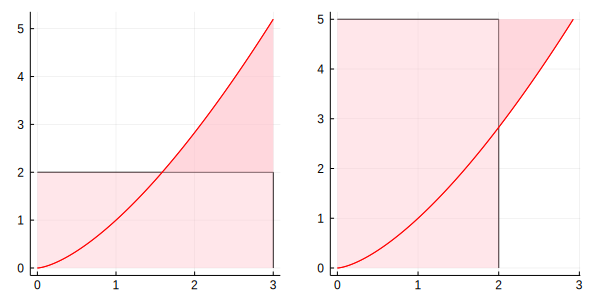

In [9]:
function plot_Young(a, b; p=2.5, kwarg...)
    q = p/(p-1)
    f(x) = x^(p-1)
    g(y) = y^(q-1)
    A = max(a, g(b))
    x = 0:a/200:a
    y = 0:b/200:b
    x1 = 0:A/200:A
    P = plot(legend=false; kwarg...)
    plot!([a,a], [0,b], color=:black)
    plot!([0,a], [b,b], color=:black)
    plot!(x, f.(x), color=:red, fill=(0, 0.4, :pink))
    plot!(x1, f.(x1), color=:red, fill=(b, 0.4, :pink))
    if A > a
        x2 = a:(A-a)/200:A
        plot!(x2, f.(x2), color=:red, fill=(b, 0.4, :pink))
    end
    P
end

P1 = plot_Young(3,2)
P2 = plot_Young(2,5)
plot(P1, P2, size=(600, 300))

 ### Hölderの不等式

#### $L^p$ ノルム

区間 $[a,b]$ 乗の連続函数 $f$ に対して $\|f\|_p$ を

$$
\|f\|_p = \left(\int_a^b \left|f(x)\right|^p\,dx\right)^{1/p}
$$

と定める. これを函数 $f$ の $L^p$ ノルムと呼ぶ.

**問題:** 定数 $\alpha$ について $\left\|\alpha f\right\|_p=|\alpha|\left\|f\right\|_p$ が成立していることを示せ.

**解答例:**
$$
\|\alpha f\|_p = \left(\int_a^b \left|\alpha f(x)\right|^p\,dx\right)^{1/p} =
\left(\left|\alpha\right|^p \int_a^b  \left|f(x)\right|^p\,dx\right)^{1/p} =
\left|\alpha\right| \left(\int_a^b  \left|f(x)\right|^p\,dx\right)^{1/p} =
|\alpha|\|f\|_p. \qquad \QED
$$

**注意:** 上の問題の結果より, 特に $g=\dfrac{f}{\|f\|_p}$ とおくと $\|g\|_p=1$ となることがわかる. $\QED$

#### 一般化されたHölderの不等式

$p > 0$, $p_i > 0$ であるとし, 

$$
\frac{1}{p_1} + \cdots + \frac{1}{p_n} = \frac{1}{p}
$$

と仮定する.  このとき, 区間 $[a,b]$ 上の連続函数 $f_i$ 達について

$$
\|f_1\cdots f_n\|_p \leqq \|f_1\|_{p_1}\cdots\|f_n\|_{p_n}
\tag{$*$}
$$

が成立する. これを**一般化されたHölderの不等式**と呼ぶことにする. $n=2$, $p=1$ の場合はHölderの不等式と呼ばれる. すなわち, $p>0$, $q>0$ かつ

$$
\frac{1}{p}+\frac{1}{q}=1
$$

のときの

$$
\|fg\|_1 \leqq \|f\|_p \|g\|_q
$$

という不等式は**Hölderの不等式**と呼ばれる. さらにこれの $p=q=2$ の場合は**Cauchy-Schwarzの不等式**の特別な場合である.

**一般化されたHölderの不等式の証明の概略:** $g_i(x) = \dfrac{f_i(x)}{\|f_i\|_{p_i}}$ とおく. そのとき $\|g_i\|_{p_i}=1$ となる.

$\ds\frac{1}{p_1} + \cdots + \frac{1}{p_n} = \frac{1}{p}$ は $\ds\frac{p}{p_1} + \cdots + \frac{p}{p_n} = 1$ と同値なので, $q_i=p_i/p$ とおくと, 

$$
q_i>0, \quad p q_i = p_i, \quad \frac{1}{q_1}+\cdots+\frac{1}{q_n} = 1.
$$

ゆえに $a_i = |g_i(x)|^p$ にYoungの不等式の一般化を適用することによって,  

$$
|g_1(x)\cdots g_n(x)|^p =
|g_1(x)|^p\cdots|g_n(x)|^p \leqq
\frac{|g_1(x)|^{pq_1}}{q_1}+\cdots+\frac{|g_n(x)|^{pq_n}}{q_n} =
\frac{|g_1(x)|^{p_1}}{q_1}+\cdots+\frac{|g_n(x)|^{p_n}}{q_n}.
$$

これを $x$ で積分すると,

$$
(\|g_1\cdots g_n\|_p)^p \leqq
\frac{(\|g_1(x)\|_{p_1})^{p_1}}{q_1}+\cdots+\frac{(\|g_n(x)\|_{p_n})^{p_n}}{q_n} =
\frac{1}{q_1}+\cdots+\frac{1}{q_n}=1.
$$

ゆえに, 

$$
\frac{\|f_1\cdots f_n\|_p}{\|f_1\|_{p_1}\cdots\|f_n\|_{p_n}} =
\|g_1\cdots g_n\|_p\leqq 1.
$$. 

したがって,

$$
\|f_1\cdots f_n\|_p\leqq \|f_1\|_{p_1}\cdots\|f_n\|_{p_n}. \qquad\QED
$$

**問題:** (一般化されていない)Youngの不等式から(一般化されていない)Hölderの不等式を導け.

**解答例の概略:** $p,q>0$, $\ds\frac{1}{p}+\frac{1}{q}=1$ と仮定する.

$$
\|fg\|_1 \leqq \|f\|_p \|g\|_q
$$

を証明したい. 左辺を右辺で割ったものが $1$ 以下になることを示せばよい. 

$$
a(x) = \frac{|f(x)|}{\|f\|_p}, \quad
b(x) = \frac{|g(x)|}{\|g\|_q}
$$

とおくと, $\|a\|_p=\|b\|_q=1$ となる.  $a(x)$, $b(x)$ にYoungの不等式を適用すると,

$$
a(x)b(x) \leqq \frac{a(x)^p}{p} + \frac{b(x)^q}{q}.
$$

両辺を $x$ について積分すると,

$$
\begin{aligned}
&
\int_a^b a(x)b(x)\,dx = \|ab\|_1 = \frac{\|fg\|_1}{\|f\|_p \|g\|_q}, 
\\ &
\int_a^b \left(\frac{a(x)^p}{p} + \frac{b(x)^q}{q}\right)\,dx = 
\frac{(\|a\|_p)^p}{p}+\frac{(\|b\|_q)^q}{q} = \frac{1}{p}+\frac{1}{q} = 1.
\end{aligned}
$$

ゆえに

$$
\frac{\|fg\|_1}{\|f\|_p \|g\|_q} \leqq 1.
$$

これより, Hölderの不等式が成立することがわかる. $\QED$

#### Cauchy-Schwarzの不等式

$p,q>0$, $\ds\frac{1}{p}+\frac{1}{q}=1$ と仮定する.  このとき, $\|f\|_p<\infty$, $\|g\|_q<\infty$ を満たす函数 $f,g$ の内積を

$$
\bra f,g\ket = \int_a^b \overline{f(x)}g(x)\,dx
$$

と定義できる. ここで $\overline{f(x)}$ は $f(x)$ の複素共役を意味している. $f(x)$ が実数ならば $\overline{f(x)}=f(x)$ である. このとき, Hölderの不等式より,

$$
|\bra f,g\ket|\leqq 
\int_a^b \left|\overline{f(x)}\right|\left|g(x)\right|\,dx =
\int_a^b \left|f(x)\right|\left|g(x)\right|\,dx =
\|fg\|_1 \leqq \|f\|_p\|g\|_q.
$$

すなわち, 

$$
|\bra f,g\ket| \leqq \|fg\|_1 \leqq \|f\|_p\|g\|_q.
$$

この不等式の $p=q=1/2$ の場合は**Cauchy-Schwarzの不等式**と呼ばれている.

#### 分配函数の対数凸性

**問題:** $a<b$ と仮定する. $Z(\beta)=\int_a^b e^{-\beta f(x)+g(x)}\,dx$ の形の函数 $Z(\beta)$ について, $\log Z(\beta)$ が $\beta$ の下に凸な函数になることをHölderの不等式を使って示せ.

**解答例:** $0<t<1$ であるとし, $p=1/(1-t)$, $q=1/t$ とおく. そのとき $\ds\frac{1}{p}+\frac{1}{q}=1$ となる. ゆえにHölderの不等式より, 

$$
\begin{aligned}
Z((1-t)\alpha+t\beta) &= Z\left(\frac{\alpha}{p}+\frac{\beta}{q}\right) =
\int_a^b e^{-(\alpha/p+\beta/q)f(x)+(1/p+1/q)g(x)}\,dx =
\int_a^b \left(e^{-\alpha f(x)+g(x)}\right)^{1/p} \left(e^{-\beta f(x)+g(x)}\right)^{1/q}\,dx
\\ &\leqq
\left(\int_a^b e^{-\alpha f(x)+g(x)}\,dx\right)^{1/p}
\left(\int_a^b e^{-\beta f(x)+g(x)}\,dx\right)^{1/q} 
\\ &=
Z(\alpha)^{1/p}\, Z(\beta)^{1/q} =
Z(\alpha)^{1-t}\; Z(\beta)^t.
\end{aligned}
$$

ゆえに

$$
\log Z((1-t)\alpha+t\beta) \leqq (1-t)\log Z(\alpha) + t\log Z(\beta).
$$

これは $\log Z(\beta)$ が $\beta$ に関する下に凸な函数であることを意味している. $\QED$

**注意:** 上の問題の $Z(\beta)$ の形の函数を**分配函数**と呼ぶことがある(統計力学). 上の問題より, Hölderの不等式は分配函数の対数が下に凸な函数になることを意味していることがわかる. $\QED$

**例(ガンマ函数の対数凸性):** $s>0$ に対して $\Gamma(s) = \int_0^\infty e^{-x} x^{s-1}\,dx = \int_0^\infty e^{(s-1)\log x-x}\,dx$ とおくと, その対数 $\log\Gamma(s)$ は $s>0$ の下に凸な函数になる. $\QED$ 

**注意:** 上の問題の記号のもとで, 函数 $h(x)$ に対する $\bra h(x)\ket=\bra h(y)\ket$ を次のように定める:

$$
\bra h(x)\ket = \frac{1}{Z(\beta)}\int_a^b h(x) e^{-\beta f(x)+g(x)}\,dx, \quad
\bra h(y)\ket = \frac{1}{Z(\beta)}\int_a^b h(y) e^{-\beta f(y)+g(y)}\,dy.
$$

さらに函数 $h(x,y)$ に対する $\bra h(x,y)\ket$ を次のように定める:

$$
\bra h(x,y)\ket = \frac{1}{Z(\beta)^2}\int_a^b\int_a^b h(x,y) e^{-\beta f(x)+g(x)}e^{-\beta f(y)+g(y)}\,dx\,dy.
$$

このとき $\bra f(x)\ket^2=\bra f(x)f(y)\ket$ などが成立している.

もしも上の問題の $Z(\beta)$ について $\beta$ に関する微分と積分の順序交換を自由にできるならば

$$
\begin{aligned}
&
-\frac{d}{d\beta}\log Z(\beta) = \frac{\int_a^b e^{-\beta f(x)+g(x)}f(x)\,dx}{Z(\beta)} = \bra f(x)\ket, 
\\ &
\frac{d^2}{d\beta^2}\log Z(\beta) = \bra f(x)^2\ket - \bra f(x)\ket^2 =
\bra f(x)f(x)\ket - \bra f(x)f(y)\ket
\\ &\qquad=
\frac{1}{2}(\bra f(x)f(x)\ket - 2\bra f(x)f(y)\ket + \bra f(y)f(y)\ket) =
\frac{1}{2}\bra (f(x)+f(y))^2\ket \geqq 0.
\end{aligned}
$$

これからも, $\log Z(\beta)$ が下に凸な函数であることがわかる. $\QED$

### Minkowskiの不等式

$L^1$ ノルムについては, 三角不等式 $|f(x)+g(x)|\leqq |f(x)|+|g(x)|$ より, 

$$
\|f+g\|_1 = \int_a^b |f(x)+g(x)|\,dx
\leqq \int_a^b(|f(x)|+|g(x)|)\,dx = \|f\|_1 + \|g\|_1
$$

が成立している. この $L^1$ ノルムに関する三角不等式はそのまま $L^p$ ノルム ($p>1$) に一般化される.

$p>1$ であると仮定する. $q=\dfrac{p}{p-1}$ とおくと, $\ds\frac{1}{p}+\frac{1}{q}=1$. このとき,

$$
\left\|\,\left|\varphi\right|^{p-1}\right\|_q=
\left\|\,\left|\varphi\right|^{p-1}\right\|_{p/(p-1)}=
\left(\int_a^b \left|\varphi(x)\right|^p\,dx\right)^{(p-1)/p}=
(\|\varphi\|_p)^{p-1}.
$$

これを $\varphi=f+g$ に適用することによって,

$$
\begin{aligned}
(\|f+g\|_p)^p &=
\int_a^b \left|f(x)+g(x)\right|^p\,dx = \int_a^b \left|f(x)+g(x)\right|\left|f(x)+g(x)\right|^{p-1}\,dx
\\ &\leqq
\int_a^b \left|f(x)\right| \left|f(x)+g(x)\right|^{p-1}\,dx +
\int_a^b \left|g(x)\right| \left|f(x)+g(x)\right|^{p-1}\,dx
\\ &\leqq
\|f\|_p \left\|\left|f(x)+g(x)\right|^{p-1}\right\|_q +
\|g\|_p \left\|\left|f(x)+g(x)\right|^{p-1}\right\|_q 
\\ &=
\|f\|_p (\|f(x)+g(x)\|_p)^{p-1} +
\|g\|_p (\|f(x)+g(x)\|_p)^{p-1}
\\ &=
(\|f\|_p+\|g\|_p) (\|f(x)+g(x)\|_p)^{p-1}
\end{aligned}
$$

ここで, 2行目の不等号で三角不等式 $|f(x)+g(x)|\leqq |f(x)|+|g(x)|$ を使い, 3行目の不等号でHölderの不等式を使った. したがって,

$$
\|f+g\|_p \leqq \|f\|_p+\|g\|_p.
$$

これを**Minkowskiの不等式**と呼ぶ.

**定義:** $\|f\|_p<\infty$ すなわち $\ds \int_a^b |f(x)|^p\,dx<\infty$ を満たす函数を **$L^p$ 函数** もしくは **$p$ 乗可積分函数** と呼ぶ. 特に $L^1$ 函数を単に**可積分函数**と呼ぶ. $\QED$

Minkowskiの不等式より, $L^p$ 函数の和も $L^p$ 函数になる.